 # **<center>  Lab 7- DFT, Magnitude-Phase Dominance** </center> 
### **Problem Statement:**



1.   Implement 2D DFT using row-column decomposition.

2.   Compute DFTs $F_1(k,l)=|F_1(k,l)|e^{j \phi_1(k,l) }$ and $F_2(k,l)=|F_2(k,l)|e^{j \phi_2(k,l) }$ of $I_1$(fourier.pgm) and $I_2$(fourier_transform.pgm) respectively. Arrive at two new images $I_3$ and $I_4$ such that their DFTs are, respectively, $F_3(k,l)=|F_1(k,l)|e^{j \phi_2(k,l) }$ and  $F_4(k,l)=|F_2(k,l)|e^{j \phi_1(k,l) }$.



### **Procedure:**
1. convert the pgm image to png format to work with.
2. For taking 2d DFT, We use 1 D DFT along row and then 1D-DFT along column


*Assumption: It is assumed that the png format images are available in the same directory.*

### 1. Importing required Libraries and Reading the images


In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from imageio import imread
from numpy.fft import fftshift, fft


In [ ]:
im_fourier = imread('fourier.png')
im_fourier_trans = imread('fourier_transform.png')


###2. Function for Bilinear Interpolation


In [ ]:
def bilinear_interpolate(zero_padded_source_image, x, y):
    # shape of the zero padded image
    dx, dy = np.shape(zero_padded_source_image)
    # get the shape of the original image
    dx, dy = dx-2, dy-2
    # +1 as we are taking coordinates with respect to a zero padded image
    x, y = x+1, y+1

    # x', y', a, b as defined in the lecture
    x_prime, y_prime = m.floor(x), m.floor(y)
    a = x-x_prime
    b = y-y_prime

    if x_prime >= 0 and x_prime <= dx and y_prime >= 0 and y_prime <= dy:
        # intensity value using bilinear interpolation
        intensity_val = (1-a)*(1-b)*zero_padded_source_image[x_prime, y_prime] \
            + (1-a)*b*zero_padded_source_image[x_prime, y_prime+1] \
            + a*(1-b)*zero_padded_source_image[x_prime+1, y_prime] \
            + a*b*zero_padded_source_image[x_prime+1, y_prime+1]
    else:
        # If the (xs, ys) does not exist in the source image, assign 0
        # for the corresponding (xt, yt) in the target image
        intensity_val = 0

    return intensity_val

###3. Function for 2D DFT
This function performs 2D DFT on given image.


In [ ]:
def dft_2D(image):
    # get the shape of the image
    m, n = np.shape(image)
    # perform row transform
    row_transform = fft(image, axis=1)
    # perform column transform on the row transformed image
    final_transform = fft(row_transform, axis=0)
    # fftshift to center the resulting DFT for more intuitive visualization
    final_transform = fftshift(final_transform)
    # get the magnitude and phase
    mag = np.abs(final_transform)
    phase = np.zeros_like(final_transform)
    phase[mag!=0] = final_transform[mag!=0]/mag[mag!=0]
    # normalize the magnitude to ensure the transform is unitary
    return mag/(np.sqrt(m*n)), phase

###4. Function to preform 2D IDFT 
This function performs 2D I-DFT on given image.

In [ ]:
def idft_2D(magnitude, phase, shift_first=True):
    # get the DFT from magnitude and phase
    dft = magnitude*phase
    # get the shape of the image
    m, n = np.shape(dft)
    # shift_first is to handle the case of the rotated DFT
    # shift_first is true in general. As fftshift has been
    # performed on the dft which is the input to this function
    # we need to undo it before calculating the IDFT
    if shift_first:
        dft = fftshift(dft)
    # perform 2D DFT on the DFT
    row_transform = fft(dft, axis=1)
    final_transform = fft(row_transform, axis=0)
    # in the case of rotated DFT, fftshift is not performed from
    # before. So use the DFT as it as and fftshift the final image
    if not shift_first:
        final_transform = fftshift(final_transform)
    # get the magnitude. We do not need the phase as we want the real
    # valued image as the output
    mag = np.abs(final_transform)
    # use the property that taking DFT of the DFT of an image results in
    # a flipped image. undo the flipping effect
    mag = mag[::-1, ::-1]
    # normalize to ensure the transform is unitary
    return mag/(np.sqrt(m*n))

###5. Fourier Transform of Given Images

In [ ]:
m1,ph1= dft_2D(im_fourier)
m2,ph2= dft_2D(im_fourier_trans)
#plt.imshow(np.log10(m1),'gray')

Visualising Images

Text(0.5, 1.0, 'Log Mag. of 2d DFT')

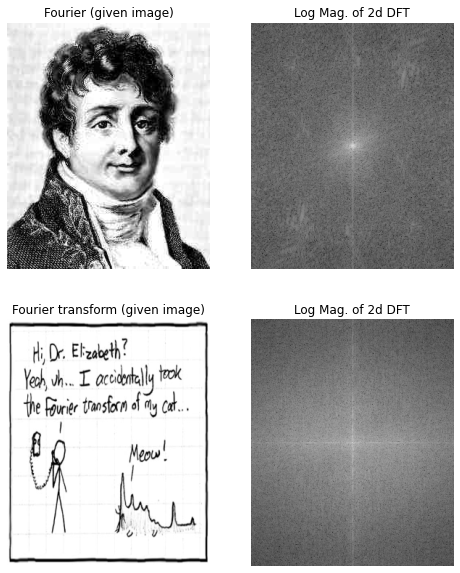

In [ ]:
#code for displaying multiple images in one figure

# create figure
fig = plt.figure(figsize=(8,10))

# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(im_fourier,'gray')
plt.axis('off')
plt.title("Fourier (given image)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(np.log10(m1),'gray')
plt.axis('off')
plt.title("Log Mag. of 2d DFT")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(im_fourier_trans,'gray')
plt.axis('off')
plt.title("Fourier transform (given image)")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(np.log10(m2),'gray')
plt.axis('off')
plt.title("Log Mag. of 2d DFT")

###6. Study of Phase Dominance of DFT


In [ ]:
im3 = idft_2D(m1, ph2)
im4 = idft_2D(m2, ph1)

Let's observe images

Text(0.5, 1.0, 'Mag2 Phase1')

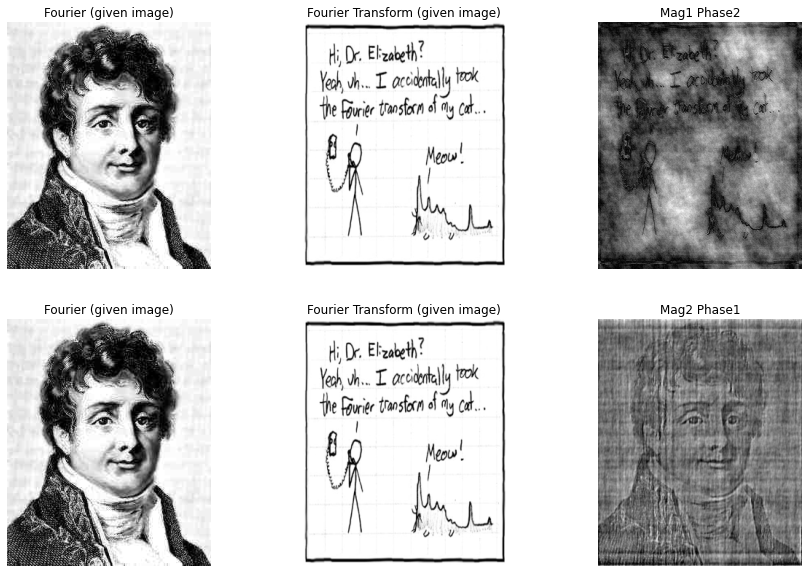

In [ ]:
#code for displaying multiple images in one figure

# create figure
fig = plt.figure(figsize=(15,10))

# setting values to rows and column variables
rows = 2
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(im_fourier,'gray')
plt.axis('off')
plt.title("Fourier (given image)")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(im_fourier_trans,'gray')
plt.axis('off')
plt.title("Fourier Transform (given image)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(im3,'gray')
plt.axis('off')
plt.title("Mag1 Phase2")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(im_fourier,'gray')
plt.axis('off')
plt.title("Fourier (given image)")



# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 5)
# showing image
plt.imshow(im_fourier_trans,'gray')
plt.axis('off')
plt.title("Fourier Transform (given image)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 6)
# showing image
plt.imshow(im4,'gray')
plt.axis('off')
plt.title("Mag2 Phase1")

#**Observations:**

By looking at the results obtained, the following observations can be made.

* We observe a white dot in the centre of DFT of images, which shows that the energy is concentrated in small region around origin.

* The 2d_DFT of *fourier_transform.png* image has a vertical and horizontal line as the image has significant changes in both directions. 

* The 2d_DFT of *fourier.png* image has a vertical line only as the image has significant changes in horizontal direction only. 

* When we mix and match the phase and magnitude of images, the image whose phase is being used shows up indicating that the phase is dominant characteristic of an image. 
